***Team 1:***

1) Pooja Shah

2) Krishna V

3) Joao Benites

# **Import Library**

In [ ]:
# importing critical modules
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

In [ ]:
# here is the zip file
!gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ

# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

# # this is the file we just uploaded to the runtime
!unzip -o -q ipopt-linux64_dw
assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

# https://drive.google.com/file/d/1Nixf7roe8lfi9U514jOrbqrCRDAHW77o/view?usp=share_link
!gdown 1Nixf7roe8lfi9U514jOrbqrCRDAHW77o

Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 70.1MB/s]
[bonmin-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of bonmin-linux64 or
        bonmin-linux64.zip, and cannot find bonmin-linux64.ZIP, period.
Downloading...
From: https://drive.google.com/uc?id=1Nixf7roe8lfi9U514jOrbqrCRDAHW77o
To: /content/PortfolioAllocation_Data_Womack.csv
100% 1.14k/1.14k [00:00<00:00, 3.95MB/s]


In [ ]:
# import modules
import pandas as pd
import numpy as np
from pylab import *
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

# https://drive.google.com/file/d/1Nixf7roe8lfi9U514jOrbqrCRDAHW77o/view?usp=share_link
!gdown 1Nixf7roe8lfi9U514jOrbqrCRDAHW77o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[bonmin-linux64.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of bonmin-linux64 or
        bonmin-linux64.zip, and cannot find bonmin-linux64.ZIP, period.
Downloading...
From: https://drive.google.com/uc?id=1Nixf7roe8lfi9U514jOrbqrCRDAHW77o
To: /content/PortfolioAllocation_Data_Womack.csv
100% 1.14k/1.14k [00:00<00:00, 4.30MB/s]


# ***1: Data Preparation and EDA***


In [ ]:
# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1.1 Data Retrieval and Cleaning***

In [ ]:
#Assigning ticker that we want to scrape
tickers_list = ['PODD','TECH','DXCM','EL','GIS','MKC','COP','HES','OKE']
#Use historical price data for each stocks to later compare with our new score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [ ]:
#Here you are able to see the information of each ticker price and they perform in the market
dow_prices

{'PODD':                   open        high         low       close    adjclose  \
 2017-01-03   38.139999   38.290001   37.220001   37.349998   37.349998   
 2017-01-04   37.430000   37.680000   36.860001   37.599998   37.599998   
 2017-01-05   37.730000   38.270000   36.799999   36.980000   36.980000   
 2017-01-06   38.119999   39.240002   37.480000   37.900002   37.900002   
 2017-01-09   37.990002   38.549999   37.700001   38.290001   38.290001   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  270.000000  276.010010  266.440002  273.260010  273.260010   
 2021-12-27  274.779999  276.250000  269.809998  272.760010  272.760010   
 2021-12-28  274.350006  274.459991  262.420013  266.170013  266.170013   
 2021-12-29  266.170013  270.970001  265.000000  270.190002  270.190002   
 2021-12-30  269.970001  275.890015  269.100006  269.570007  269.570007   
 
             volume ticker  
 2017-01-03  524600   PODD  
 2017-01-04  479100   PODD  
 20

### ***1.1.1: Pulling data in a data frame***

In [ ]:
#Now we are only exctracting the data that we need. (adjclose)
#Then we get the adjclose price for the PODD (one sample)
prep_data = pd.DataFrame(dow_prices['PODD']['adjclose']).rename(columns = {"adjclose":"PODD"})

#After that we combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,PODD,TECH,DXCM,EL,GIS,MKC,COP,HES,OKE
2017-01-03,37.349998,24.688120,14.562500,72.731911,49.598934,42.182537,41.664703,56.335873,38.976162
2017-01-04,37.599998,25.258345,15.180000,74.020462,49.582973,42.060848,42.051628,55.537739,38.876648
2017-01-05,36.980000,24.822851,15.665000,73.926399,49.726757,41.236023,41.928135,55.690201,39.029232
2017-01-06,37.900002,24.955187,15.807500,74.453094,49.485237,41.195465,41.771713,55.510845,38.412254
2017-01-09,38.290001,24.839693,15.622500,73.587776,48.752651,40.627567,40.882610,54.353989,38.133614
...,...,...,...,...,...,...,...,...,...
2021-12-23,273.260010,123.094315,143.002502,361.398621,63.312302,90.609688,66.883743,72.324196,53.830410
2021-12-27,272.760010,124.589905,142.470001,364.637451,63.379456,91.681061,68.781555,74.410576,55.120037
2021-12-28,266.170013,123.875702,132.375000,363.185913,64.175781,92.489471,68.696991,74.085808,55.110756
2021-12-29,270.190002,125.050285,133.850006,365.437317,64.300507,93.132309,68.509079,73.485481,54.526253


In [ ]:
#This allows us to see the shape of the current data
prep_data.shape

(1258, 9)

### ***1.1.2: Dropping NA values from the data frame***

In [ ]:
#Now we will create the return features for each ticker.
#Then we will just use a pct_change as the return.
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
#We will also drop any of the na records.
return_data.dropna(inplace=True)
return_data

,PODD,TECH,DXCM,EL,GIS,MKC,COP,HES,OKE
2017-01-04,0.006693,0.023097,0.042403,0.017716,-0.000322,-0.002885,0.009287,-0.014167,-0.002553
2017-01-05,-0.016489,-0.017242,0.031950,-0.001271,0.002900,-0.019610,-0.002937,0.002745,0.003925
2017-01-06,0.024878,0.005331,0.009097,0.007125,-0.004857,-0.000984,-0.003731,-0.003221,-0.015808
2017-01-09,0.010290,-0.004628,-0.011703,-0.011622,-0.014804,-0.013785,-0.021285,-0.020840,-0.007254
2017-01-10,0.075999,0.007459,0.072812,-0.011375,-0.001816,-0.003883,0.000000,0.013859,-0.024530
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.014366,0.010129,-0.001362,0.011861,0.004414,-0.003855,0.001548,-0.008366,0.004154
2021-12-27,-0.001830,0.012150,-0.003724,0.008962,0.001061,0.011824,0.028375,0.028848,0.023957
2021-12-28,-0.024160,-0.005732,-0.070857,-0.003981,0.012564,0.008818,-0.001229,-0.004365,-0.000168
2021-12-29,0.015103,0.009482,0.011143,0.006199,0.001943,0.006950,-0.002735,-0.008103,-0.010606


In [ ]:
#Now let's see return data shape.
return_data.shape

(1257, 9)

## ***1.2: Time Series Visualizations***






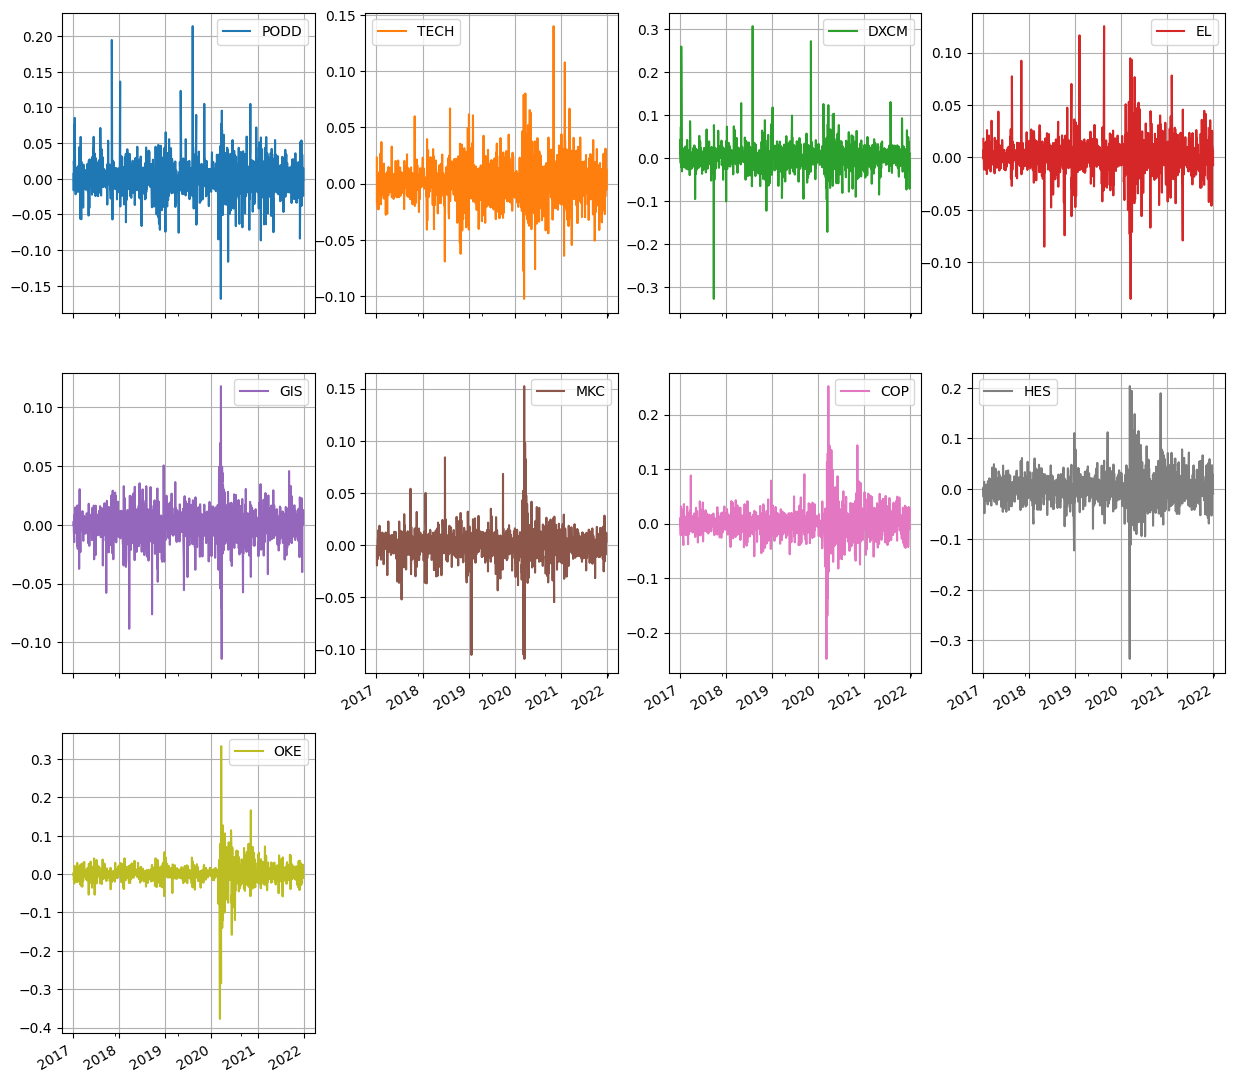

In [ ]:
return_data.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

### ***1.2.1: Visualization of Pharma Sector***

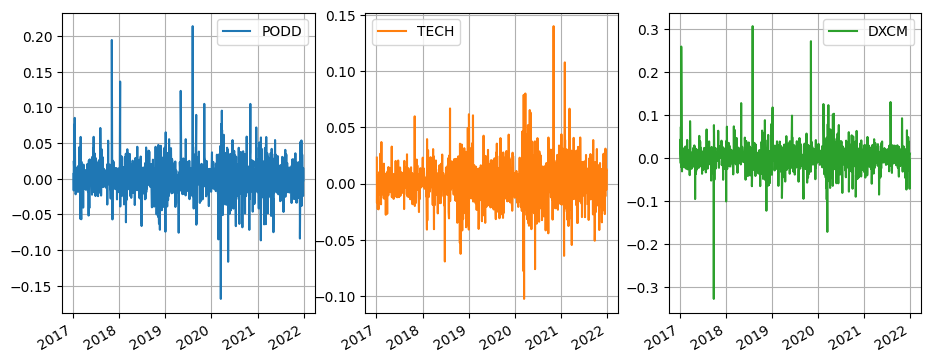

In [ ]:
pharma = return_data.iloc[:,:3]
pharma


pharma.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

### ***1.2.2: Visualization of Consumer Staples Sector***

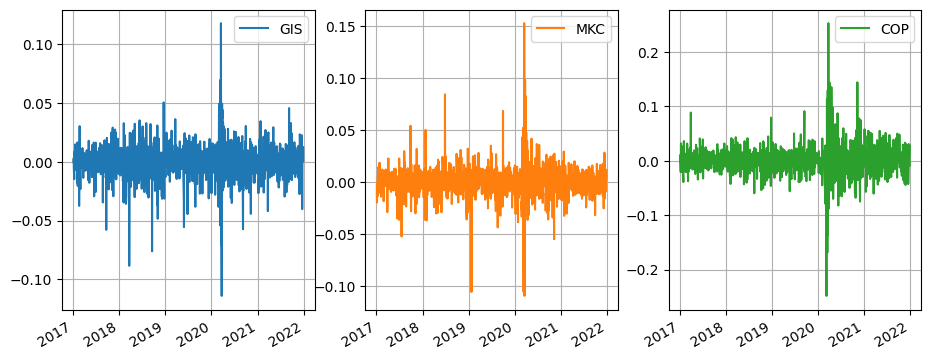

In [ ]:
consumer = return_data.iloc[:,4:7]
consumer


consumer.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()


### ***1.2.3: Visualization of Energy Sector***

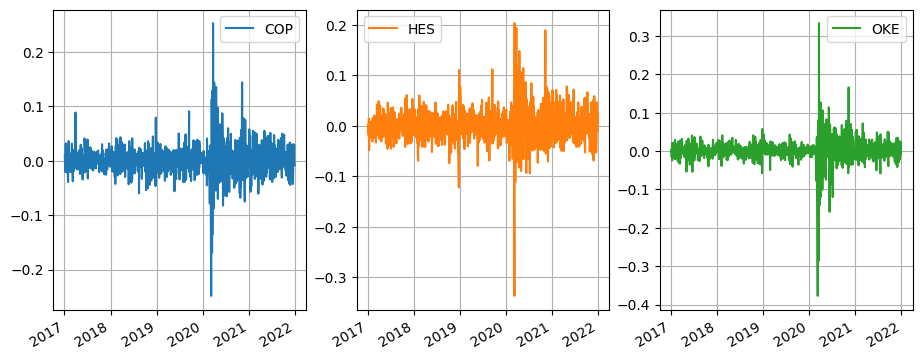

In [ ]:
energy = return_data.iloc[:,-3:]
energy


energy.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

## ***1.3: Discussion of the Plots***

### ***1.3.1:Health Sector***

1) **Insulet(Podd)** stock performs at low price as well as negative most of the time. From 2020 to middle of 2022 the stock performs most negatively due to pandemic period.

2) **Dexcom(Tech)** stock perform very well from 2017 to 2022 when compared to PODD and TMO becuase most the years the stock had positive trend.

3) **Thermo Fisher(TMO)** stock perfrom very poor when compared to Podd and Tech because it was fluctuating more in positive and negative direction which means it is a high volatile stock. The pandemic period (2020-2022) show big impact on this stock.

### ***1.3.2: Consumer Sector***



1) **Estee Lauder(EL)** stock have continous fluctuations from since 2017 to 2022. The stock indicates high volatile risks but in the smae way it had high returns.

2) **McCormick(MKC)** stock have continous fluctuations from since 2017 to 2022 and except 2022. Most of the time the stock movies in positive direction but thier is a seasonality in the some months in terms of returns.

3) **Comapared to EL and MKC**, the general mills(GIS) stock had less volatile and retruns very small.




### ***1.3.3: Energy Sector***

1) In all 3 stocks i.e. **ConocoPhillips(cp),Hess Corp(hes), Oneokwe(OKE)** can see that there is a sudden drop in stocks at 2020 but compared to OKE the other 2 stocks have high volatile in nature but we can get high returns from this stocks.

# ***2: Optimization Model***



### ***Renaming the data frame for ease of re-usability***

In [ ]:
# Rename the dataFrame for easy usability
df = return_data
df

,PODD,TECH,DXCM,EL,GIS,MKC,COP,HES,OKE
2017-01-04,0.006693,0.023097,0.042403,0.017716,-0.000322,-0.002885,0.009287,-0.014167,-0.002553
2017-01-05,-0.016489,-0.017242,0.031950,-0.001271,0.002900,-0.019610,-0.002937,0.002745,0.003925
2017-01-06,0.024878,0.005331,0.009097,0.007125,-0.004857,-0.000984,-0.003731,-0.003221,-0.015808
2017-01-09,0.010290,-0.004628,-0.011703,-0.011622,-0.014804,-0.013785,-0.021285,-0.020840,-0.007254
2017-01-10,0.075999,0.007459,0.072812,-0.011375,-0.001816,-0.003883,0.000000,0.013859,-0.024530
...,...,...,...,...,...,...,...,...,...
2021-12-23,0.014366,0.010129,-0.001362,0.011861,0.004414,-0.003855,0.001548,-0.008366,0.004154
2021-12-27,-0.001830,0.012150,-0.003724,0.008962,0.001061,0.011824,0.028375,0.028848,0.023957
2021-12-28,-0.024160,-0.005732,-0.070857,-0.003981,0.012564,0.008818,-0.001229,-0.004365,-0.000168
2021-12-29,0.015103,0.009482,0.011143,0.006199,0.001943,0.006950,-0.002735,-0.008103,-0.010606


## ***2.1: Model execution***

### ***2.1.1: Calculating the return and standard deviation of each stock***

In [ ]:
# Calculate the average return for each stock
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print(Avg_Return)

# Calculate the standard deviation of return for each stock
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
PODD    0.001896
TECH    0.001466
DXCM    0.002262
EL      0.001442
GIS     0.000313
MKC     0.000747
COP     0.000738
HES     0.000691
OKE     0.000730
      Std_Dev_Return
PODD        0.025507
TECH        0.018172
DXCM        0.031265
EL          0.018053
GIS         0.014540
MKC         0.015102
COP         0.026358
HES         0.030956
OKE         0.029714


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### ***2.1.2: Plotting the covariance matrix***

In [ ]:
# here's the covariance matrix
Covariance_matrix = df.cov()
Covariance_matrix

,PODD,TECH,DXCM,EL,GIS,MKC,COP,HES,OKE
PODD,0.000651,0.000190,0.000405,0.000131,0.000015,0.000059,0.000121,0.000141,0.000158
TECH,0.000190,0.000331,0.000201,0.000116,0.000043,0.000073,0.000117,0.000118,0.000132
DXCM,0.000405,0.000201,0.000978,0.000130,0.000028,0.000075,0.000151,0.000174,0.000148
EL,0.000131,0.000116,0.000130,0.000326,0.000056,0.000092,0.000190,0.000209,0.000192
GIS,0.000015,0.000043,0.000028,0.000056,0.000212,0.000122,0.000041,0.000036,0.000025
MKC,0.000059,0.000073,0.000075,0.000092,0.000122,0.000228,0.000077,0.000078,0.000049
COP,0.000121,0.000117,0.000151,0.000190,0.000041,0.000077,0.000695,0.000657,0.000576
HES,0.000141,0.000118,0.000174,0.000209,0.000036,0.000078,0.000657,0.000959,0.000613
OKE,0.000158,0.000132,0.000148,0.000192,0.000025,0.000049,0.000576,0.000613,0.000884


### ***2.1.3: Plotting the correlation matrix***

In [ ]:
# here's the correlation matrix
import seaborn as sns
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PODD,TECH,DXCM,EL,GIS,MKC,COP,HES,OKE
PODD,1.000000,0.409380,0.507457,0.283194,0.041503,0.154224,0.180093,0.178053,0.208935
TECH,0.409380,1.000000,0.354143,0.354620,0.160809,0.267416,0.243597,0.210136,0.244441
DXCM,0.507457,0.354143,1.000000,0.230282,0.060625,0.158584,0.183657,0.179518,0.158918
EL,0.283194,0.354620,0.230282,1.000000,0.212971,0.338672,0.398875,0.373990,0.358383
GIS,0.041503,0.160809,0.060625,0.212971,1.000000,0.556236,0.107137,0.079109,0.057109
MKC,0.154224,0.267416,0.158584,0.338672,0.556236,1.000000,0.193007,0.166117,0.108989
COP,0.180093,0.243597,0.183657,0.398875,0.107137,0.193007,1.000000,0.805181,0.735457
HES,0.178053,0.210136,0.179518,0.373990,0.079109,0.166117,0.805181,1.000000,0.665461
OKE,0.208935,0.244441,0.158918,0.358383,0.057109,0.108989,0.735457,0.665461,1.000000


### ***2.1.4: Covariance table and average return table***

In [ ]:
# Creating covariance table on stock return dataframe

df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# Create the average of each stock
# These are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
          PODD      TECH      DXCM        EL       GIS       MKC       COP  \
PODD  0.000651  0.000190  0.000405  0.000131  0.000015  0.000059  0.000121   
TECH  0.000190  0.000331  0.000201  0.000116  0.000043  0.000073  0.000117   
DXCM  0.000405  0.000201  0.000978  0.000130  0.000028  0.000075  0.000151   
EL    0.000131  0.000116  0.000130  0.000326  0.000056  0.000092  0.000190   
GIS   0.000015  0.000043  0.000028  0.000056  0.000212  0.000122  0.000041   
MKC   0.000059  0.000073  0.000075  0.000092  0.000122  0.000228  0.000077   
COP   0.000121  0.000117  0.000151  0.000190  0.000041  0.000077  0.000695   
HES   0.000141  0.000118  0.000174  0.000209  0.000036  0.000078  0.000657   
OKE   0.000158  0.000132  0.000148  0.000192  0.000025  0.000049  0.000576   

           HES       OKE  
PODD  0.000141  0.000158  
TECH  0.000118  0.000132  
DXCM  0.000174  0.000148  
EL    0.000209  0.000192  
GIS   0.000036  0.000025  
MKC   0.000078  0.000049  
COP   0.000

### ***2.1.5: Calculating the risk matrix***

### ***2.1.6: Creating the model***

In [ ]:
from pyomo.environ import *

# Creating the model
m = ConcreteModel()

# Declaring new variable names to above decision varaibles for better use of substitution
m.a1 =  Var(within=NonNegativeReals, bounds=(0,1)) # PODD
m.a2 =  Var(within=NonNegativeReals, bounds=(0,1)) # TECH
m.a3 =  Var(within=NonNegativeReals, bounds=(0,1)) # DXCM
m.a4 =  Var(within=NonNegativeReals, bounds=(0,1)) # Estee Lauder
m.a5 =  Var(within=NonNegativeReals, bounds=(0,1)) # GIS
m.a6 =  Var(within=NonNegativeReals, bounds=(0,1)) # McCormick
m.a7 =  Var(within=NonNegativeReals, bounds=(0,1)) # ConocoPhillips
m.a8 =  Var(within=NonNegativeReals, bounds=(0,1)) # Hess Corp
m.a9 =  Var(within=NonNegativeReals, bounds=(0,1)) # OKE

# Declaring another set of binary variables to select or not select the stocks
m.b1 = Var(within = Binary) # PODD
m.b2 = Var(within = Binary) # TECH
m.b3 = Var(within = Binary) # DXCM
m.b4 = Var(within = Binary) # Estee Lauder
m.b5 = Var(within = Binary) # GIS
m.b6 = Var(within = Binary) # McCormick
m.b7 = Var(within = Binary) # ConocoPhillips
m.b8 = Var(within = Binary) # Hess Corp
m.b9 = Var(within = Binary) # OKE

# Declare objective
m.objective = Objective(expr = m.a1*m.b1*df_return[0] +
                               m.a2*m.b2*df_return[1] +
                               m.a3*m.b3*df_return[2] +
                               m.a4*m.b4*df_return[3] +
                               m.a5*m.b5*df_return[4] +
                               m.a6*m.b6*df_return[5] +
                               m.a7*m.b7*df_return[6] +
                               m.a8*m.b8*df_return[7] +
                               m.a9*m.b9*df_return[8],
                        sense = maximize)


# Declare constraints

# 1. Sum of all porportions = 1
m.c1 = Constraint(expr = m.a1 + m.a2  + m.a3 + m.a4 + m.a5 + m.a6 + m.a7 + m.a8 + m.a9 == 1)

# 2. Set minimum risk
m.c2 = Constraint(expr = m.a1 + m.a2  + m.a3 + m.a4  + m.a5 + m.a6 + m.a7 + m.a8 + m.a9 >= 0.0)

# 3. Selecting at least one stock from each of the categories
m.c3 = Constraint(expr = m.b1 + m.b2 + m.b3 == 1)
m.c4 = Constraint(expr = m.b4 + m.b5 + m.b6 == 1)
m.c5 = Constraint(expr = m.b7 + m.b8 + m.b9 == 1)

In [ ]:
# creating calculations table for calculate the risk
# Calculate risk
# Max risk
max_risk = 0.0005

def calc_risk(m):
  variables = m.a1, m.a2, m.a3, m.a4, m.a5, m.a6, m.a7, m.a8, m.a9
  tickers = tickers_list
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# Sequence of risk levels
risk_limits = np.arange(0.00001, max_risk, 0.00004)

In [ ]:
options = {'bonmin': {'memory_limit': 4000}}

In [ ]:
# LINKING CONSTRAINTS
# which can help us decide if we should even invest in that stock!
m.l1 = Constraint(expr = m.a1 - 1*m.b1 <= 0)
m.l2 = Constraint(expr = m.a2 - 1*m.b2 <= 0)
m.l3 = Constraint(expr = m.a3 - 1*m.b3 <= 0)
m.l4 = Constraint(expr = m.a4 - 1*m.b4 <= 0)
m.l5 = Constraint(expr = m.a5 - 1*m.b5 <= 0)
m.l6 = Constraint(expr = m.a6 - 1*m.b6 <= 0)
m.l7 = Constraint(expr = m.a7 - 1*m.b7 <= 0)
m.l8 = Constraint(expr = m.a8 - 1*m.b8 <= 0)
m.l9 = Constraint(expr = m.a9 - 1*m.b9 <= 0)

### ***2.1.7: Running the model***

In [ ]:
# Updating risk contraint for each limit and then solving the problem
from pyomo.opt import SolverStatus, TerminationCondition

param_analysis = {} # key=risk, value = stock allocations
returns = {} # key=risk, value = return

for r in risk_limits:

  m.del_component(m.c2)
  m.c2 = Constraint(expr = expr_risk <= r)

  # Run solver
  try:
    result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m).write()

    # Store our allocation proportions
    param_analysis[r] = [m.a1(), m.a2(), m.a3(), m.a4(), m.a5(), m.a6(), m.a7(), m.a8(), m.a9()]

    # Store our returns
    # returns[r] =  m.a1*df_return[0] + m.a2*df_return[1] + m.a3*df_return[2] + m.a4*df_return[3] + m.a5*df_return[4] +  m.a6*df_return[5] + m.a7*df_return[6] + m.a8*df_return[7] + m.a9*df_return[8]
    returns[r] = m.objective()

  # Remove infeasible solutions
  except:

    print('Infeasible solution!')
    continue # Check for the next risk level


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.core:evaluating object as numeric value: a1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object a1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.2625589370727539
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasibl

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.core:evaluating object as numeric value: a1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object a1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.17674946784973145
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.core:evaluating object as numeric value: a1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object a1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 0.22999882698059082
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasib

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
ERROR:pyomo.core:evaluating object as numeric value: a1
    (object: <class 'pyomo.core.base.var.ScalarVar'>)
No value for uninitialized NumericValue object a1


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: bonmin\x3a Infeasible problem
  Termination condition: infeasible
  Id: 220
  Error rc: 0
  Time: 8.969679355621338
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Infeasible

## ***2.2: Plot with allocation of the stocks***

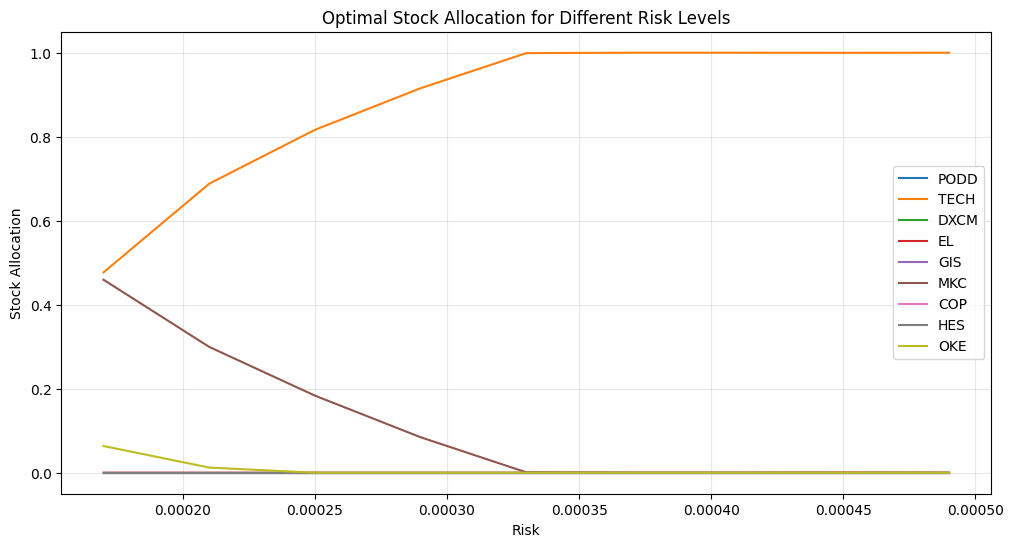

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['PODD','TECH','DXCM','EL','GIS','MKC','COP','HES','OKE']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
xlabel('Risk')
ylabel('Stock Allocation')
plt.grid(True, alpha = .3)
plt.show()

## ***2.3: Plot with efficient frontier***

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)

reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.00017, 0.00021, 0.00025000000000000006, 0.00029000000000000006, 0.00033000000000000005, 0.00037000000000000005, 0.00041000000000000005, 0.00045000000000000004, 0.0004900000000000001]
[0.0010889160978040545, 0.001241514985709436, 0.0013338816897272912, 0.0014050760934158834, 0.0014650912990051893, 0.001465780351260584, 0.0014657803207061074, 0.0014657726834760919, 0.0014657803261741474]


In [ ]:
# Showing the results for stocks being selected

print(round(m.b1(),2))
print(round(m.b2(),2))
print(round(m.b3(),2))
print(round(m.b4(),2))
print(round(m.b5(),2))
print(round(m.b6(),2))
print(round(m.b7(),2))
print(round(m.b8(),2))
print(round(m.b9(),2))

0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0


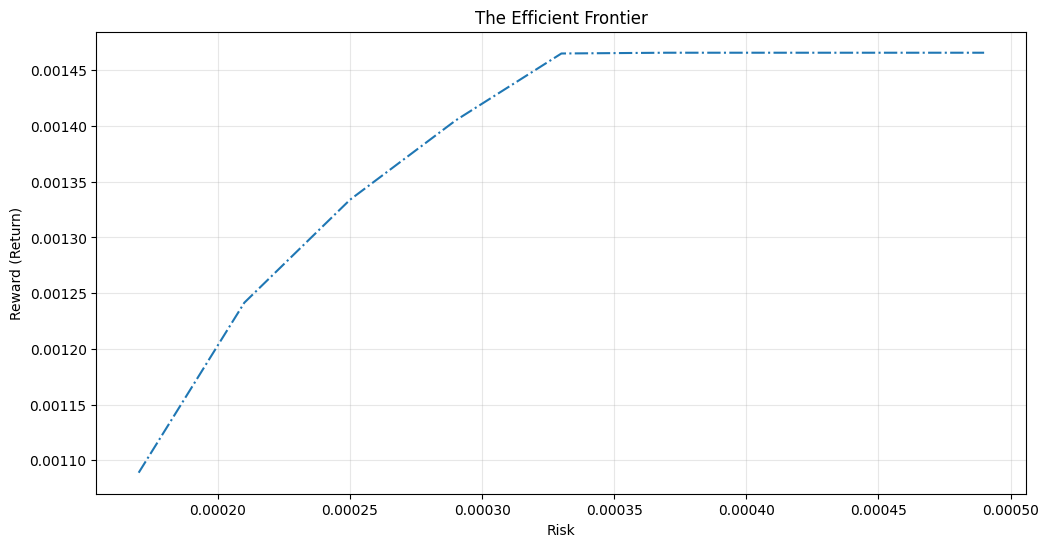

In [ ]:
# Plot the graph

from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.grid(True, alpha = .3)
plt.show()

##### ***As seen from above efficiency frontier, considering lower risks with a diverse set of portfolio, we went ahead to select stocks from lower risk levels of 0.00015 to 0.003***.

## ***2.4: Portfolio selection***

#### ***2.4.1: Stock selection:***

Selecting the stocks basis our selected risk levels in the range of 0.00015 to 0.003

In [ ]:
# Showing stock allocations for risk levels from 0.00015 to 0.003
round(param_analysis[0.00015:0.003], 3)

,PODD,TECH,DXCM,EL,GIS,MKC,COP,HES,OKE
0.00017,0.0,0.477,0.0,0.0,0.0,0.459,0.0,0.0,0.064
0.00021,0.0,0.688,0.0,0.0,0.0,0.300,0.0,0.0,0.012
0.00025,0.0,0.816,0.0,0.0,0.0,0.184,0.0,0.0,0.000
0.00029,0.0,0.916,0.0,0.0,0.0,0.084,0.0,0.0,0.000
0.00033,0.0,0.999,0.0,0.0,0.0,0.001,0.0,0.0,0.000
0.00037,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000
0.00041,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000
0.00045,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000
0.00049,0.0,1.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000


#### ***Based on the above risk matrix, we decided to select on the stocks at risk level 0.00017 which had a balanced share of stock allocations for 2 stocks and low risk:***

- **47.7 %** in TECH for Pharma sector
- **45.9%** is in MKC for Consumer Staples sector
- **6.4%** is in OKE for Energy sector

In [ ]:
# Setting the variables with above stock allocations to decide on the strategy:

TECH_stock = 0.477
MKC_stock = 0.459
OKE_stock = 0.064

# Total investment fund
invest_fund = 100000

# Calculate the investment in each stock
TECH_invest = TECH_stock*invest_fund
print("Investment in TECH: $" + str(round(TECH_invest, 2)))
MKC_invest = MKC_stock*invest_fund
print("Investment in MKC: $" + str(round(MKC_invest, 2)))
OKE_invest = OKE_stock*invest_fund
print("Investment in OKE: $" + str(round(OKE_invest, 2)))

Investment in TECH: $47700.0
Investment in MKC: $45900.0
Investment in OKE: $6400.0


# ***3: Analyis***

In [ ]:
# Loading data from 2022
# Start date: 12/2/2021 as we need data of last 21 days as on 1st Jan
# End date: 1/1/2023 as we need data until end of the year - full Dec

tickers_select = ['TECH', 'MKC', 'OKE']
df = {ticker : si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d') for ticker in tickers_select}

# Assigning first days basis actual trading days
first_days = ['2022-01-03','2022-02-01','2022-03-01','2022-04-01','2022-05-02','2022-06-01', '2022-07-01','2022-08-01','2022-09-01','2022-10-03','2022-11-01','2022-12-01']

In [ ]:
# Loading data for TECH

print("Health Sector")
ticker = "TECH"
TECH = si.get_data(ticker,start_date = '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(TECH) + 1) #generate list of trading days
TECH['Day'] = day

# Dropping columns I don't want to use
TECH.drop(columns=['adjclose', 'volume','ticker'], inplace = True)

# Reorganizing the columns
TECH = TECH[['Day', 'open', 'high', 'low', 'close']]

# Renaming the columns
TECH.columns = ['Day', 'Open', 'High', 'Low', 'Close']

# Printing
print(TECH.head())



# Loading data for MKC

print("\n"," Consumer staples")
ticker1 = "MKC"
MKC = si.get_data(ticker1,start_date =  '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(MKC) + 1) #generate list of trading days
MKC['Day'] = day

# Dropping columns I don't want to use
MKC.drop(columns=['adjclose', 'volume','ticker'], inplace = True)

# Reorganizing the columns
MKC = MKC[['Day', 'open', 'high', 'low', 'close']]

# Renaming the columns
MKC.columns = ['Day', 'Open', 'High', 'Low', 'Close']
print(MKC.head())



# Loading data for OKE

print("\n"," Energy Sector")
ticker2 = "OKE"
OKE= si.get_data(ticker2,start_date =  '12/2/2021',end_date='1/1/2023',interval='1d')
day = np.arange(1, len(OKE) + 1) #generate list of trading days
OKE['Day'] = day

# Dropping columns I don't want to use
OKE.drop(columns=['adjclose', 'volume','ticker'], inplace = True)

# Reorganizing the columns
OKE = OKE[['Day', 'open', 'high', 'low', 'close']]

# Renaming the columns
OKE.columns = ['Day', 'Open', 'High', 'Low', 'Close']
print(OKE.head())


Health Sector
            Day        Open        High         Low       Close
2021-12-02    1  114.860001  117.362503  114.152496  116.817497
2021-12-03    2  117.392502  117.392502  112.437500  114.037498
2021-12-06    3  114.132500  117.232498  112.644997  117.059998
2021-12-07    4  118.357498  120.389999  117.052498  118.239998
2021-12-08    5  118.949997  121.544998  118.272499  120.324997

  Consumer staples
            Day       Open       High        Low      Close
2021-12-02    1  86.940002  88.110001  86.889999  87.010002
2021-12-03    2  87.629997  88.570000  87.099998  88.540001
2021-12-06    3  89.040001  90.449997  88.790001  90.110001
2021-12-07    4  90.150002  90.290001  87.040001  87.830002
2021-12-08    5  87.839996  89.019997  87.839996  88.650002

  Energy Sector
            Day       Open       High        Low      Close
2021-12-02    1  58.730000  60.910000  57.700001  60.689999
2021-12-03    2  61.380001  61.720001  59.520000  60.009998
2021-12-06    3  60.95999

## ***3.1: Buy-and-Hold strategy for the MPT portfolio***

In [ ]:
# Creating Buy and hold data details
Buy_Hold = pd.DataFrame()


# Storing prices for closing from 1st Jan onwards
Buy_Hold['TECH_Shareprice'] = df['TECH']['close']
Buy_Hold['MKC_Shareprice'] = df['MKC']['close']
Buy_Hold['OKE_Shareprice'] = df['OKE']['close']


# Capturing data from 1st Jan
Buy_Hold.loc['2022-1-1'::]


# Assuming we bought it on first trading day of Jan which is 3rd, storing the stock prices in below variables
Price_TECH_Buy = Buy_Hold['TECH_Shareprice'].loc['2022-1-3']
Price_MKC_Buy = Buy_Hold['MKC_Shareprice'].loc['2022-1-3']
Price_OKE_Buy = Buy_Hold['OKE_Shareprice'].loc['2022-1-3']


# Calculating total number of stocks
TECH_share = TECH_invest / Price_TECH_Buy
MKC_share = MKC_invest / Price_MKC_Buy
OKE_share = OKE_invest / Price_OKE_Buy


# Creating column with investment and for all the stocks in Buy and Hold data frame
Buy_Hold['TECH_Investment'] = Buy_Hold['TECH_Shareprice'] * TECH_share
Buy_Hold['MKC_Investment'] = Buy_Hold['MKC_Shareprice'] * MKC_share
Buy_Hold['OKE_Investment'] = Buy_Hold['OKE_Shareprice'] * OKE_share


# Aggregating the above values to show total portfolio value at day level
Buy_Hold["Portfolio Value"] = Buy_Hold['TECH_Investment'] + Buy_Hold['MKC_Investment'] + Buy_Hold['OKE_Investment']


# Creating a column that shows tota return
Buy_Hold['Return'] = Buy_Hold["Portfolio Value"]  - invest_fund

# Printing the outputs post dropping non - required columns
Buy_Hold = Buy_Hold.loc[first_days].copy().reset_index()
Buy_Hold = Buy_Hold.drop(['TECH_Shareprice','MKC_Shareprice','OKE_Shareprice'], axis = 1)

In [ ]:
# Printig the data frame showing results for Investment / Value and Return
Buy_Hold.rename(columns = {"index":"First Day"}, inplace = True)
Buy_Hold

,First Day,TECH_Investment,MKC_Investment,OKE_Investment,Portfolio Value,Return
0,2022-01-03,47700.000000,45900.000000,6400.000000,100000.000000,0.000000
1,2022-02-01,39268.720174,48137.037327,6600.566462,94006.323963,-5993.676037
2,2022-03-01,41088.553065,46105.980109,6808.601211,94003.134385,-5996.865615
3,2022-04-01,42368.597376,48822.040606,7620.469898,98811.107879,-1188.892121
4,2022-05-02,37411.724389,46915.530436,6813.935351,91141.190177,-8858.809823
5,2022-06-01,35198.784890,43456.982564,7131.854947,85787.622401,-14212.377599
6,2022-07-01,34536.758350,39600.844584,6054.342221,80191.945155,-19808.054845
7,2022-08-01,37478.222484,42024.704309,6307.184240,85810.111034,-14189.888966
8,2022-09-01,32547.751178,40616.375020,6349.858181,79513.984379,-20486.015621
9,2022-10-03,28658.724255,34686.069492,5712.951917,69057.745664,-30942.254336


#### ***Conclusion: We are down by 17964$ at the end!!!***

## ***3.2: Momentum trading strategy for each stock in the MPT portfolio***

#### ***3.2.1: TECH***

In [ ]:
# Using the data frame created earlier, create a new data frame to evaluate 8 day and 21 day moving averages

TECH1 = df['TECH'].copy()
TECH1['Log Close'] = np.log(TECH1['close'])
TECH1['Return'] = TECH1['Log Close'].diff()
TECH1['8-day'] = TECH1['close'].rolling(8).mean().shift()
TECH1['21-day'] = TECH1['close'].rolling(21).mean().shift()
TECH1.dropna(inplace=True)
TECH1.head(n=10)

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day
2022-01-03,129.157501,129.762497,121.330002,121.947502,121.387192,1001200,TECH,4.803591,-0.058815,124.721251,119.978572
2022-01-04,121.300003,121.300003,115.972504,117.004997,116.467400,1361200,TECH,4.762217,-0.041374,124.975939,120.222858
2022-01-05,116.627502,117.470001,108.330002,108.682503,108.183144,1824400,TECH,4.688431,-0.073786,124.298751,120.364167
2022-01-06,107.290001,108.739998,104.832497,106.635002,106.145050,1223200,TECH,4.669412,-0.019019,122.426251,119.965239
2022-01-07,106.220001,106.592499,102.934998,103.820000,103.342979,1000400,TECH,4.642659,-0.026753,120.110002,119.412620
2022-01-10,101.760002,107.487503,100.264999,106.942497,106.451126,1323200,TECH,4.672291,0.029633,117.531564,118.626668
2022-01-11,106.889999,108.467499,104.802498,108.077499,107.580925,868400,TECH,4.682849,0.010557,115.195938,118.121548
2022-01-12,108.097504,109.489998,105.275002,107.092499,106.600449,790800,TECH,4.673693,-0.009156,112.805626,117.720000
2022-01-13,106.887497,106.972504,99.137497,99.419998,98.963203,1217600,TECH,4.599353,-0.074340,110.025312,117.220000
2022-01-14,99.000000,100.497498,95.775002,97.527496,97.079391,1500000,TECH,4.580134,-0.019219,107.209374,116.443810


In [ ]:
# Checking on investment if moving 8 day average is better than 21 day average

TECH1['Yes_Invest'] = np.where(TECH1['8-day'] > TECH1['21-day'], 1, 0)
print(TECH1['Yes_Invest'].value_counts())

0    143
1    108
Name: Yes_Invest, dtype: int64


##### ***3.2.1.1: Strategy on entering or leaving the market:***

In [ ]:
TECH1['Signal'] = TECH1['Yes_Invest'].diff()
TECH1.loc["2022-01-03",'Signal'] = 1 # Buy TECH on the first trading day basis signal

# Checking on how many days would we invest in the stock
print(TECH1['Signal'].value_counts())

# 1 - Means invest - YES
# 0 - Means - Do nothing
# -1 Means - NO - move out

 0.0    229
 1.0     11
-1.0     11
Name: Signal, dtype: int64


In [ ]:
# Checking on trading days

TECH1[TECH1['Signal'].isin([1,-1])]

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day,Yes_Invest,Signal
2022-01-03,129.157501,129.762497,121.330002,121.947502,121.387192,1001200,TECH,4.803591,-0.058815,124.721251,119.978572,1,1.0
2022-01-10,101.760002,107.487503,100.264999,106.942497,106.451126,1323200,TECH,4.672291,0.029633,117.531564,118.626668,0,-1.0
2022-02-08,102.900002,104.332497,101.370003,103.337502,102.862701,1220400,TECH,4.638000,0.001622,98.410313,98.303571,1,1.0
2022-03-01,104.897499,106.730003,104.052498,105.044998,104.641312,920800,TECH,4.654389,0.001834,101.834374,101.895952,0,-1.0
2022-03-04,104.445000,105.654999,102.269997,104.397499,103.996300,1225200,TECH,4.648206,-0.005326,103.473436,103.307976,1,1.0
2022-03-15,99.360001,101.507500,98.417503,101.400002,101.010323,899200,TECH,4.619073,0.033570,101.840312,102.457380,0,-1.0
2022-03-21,109.834999,111.687500,107.470001,109.559998,109.138962,824800,TECH,4.696472,-0.016655,104.149688,103.044881,1,1.0
2022-04-13,102.872498,105.957497,102.407501,104.849998,104.447052,583600,TECH,4.652531,0.015983,107.832500,108.281667,0,-1.0
2022-06-03,92.162498,92.452499,90.377502,90.775002,90.509163,791200,TECH,4.508384,-0.029604,91.564377,91.237620,1,1.0
2022-06-13,80.982498,81.940002,80.257500,81.245003,81.007080,1230400,TECH,4.397469,-0.029023,90.028126,90.698929,0,-1.0


##### ***3.2.1.2: Plotting the graph***

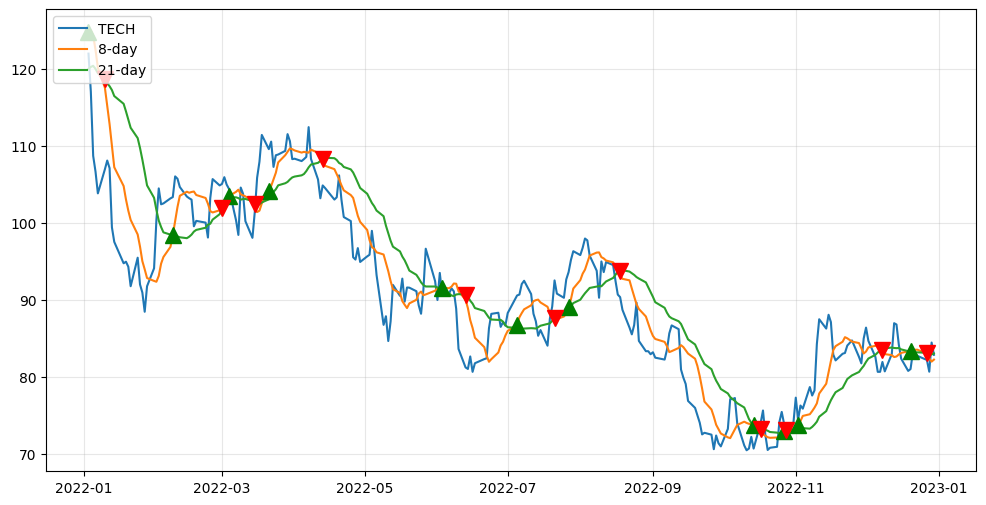

In [ ]:
# Showing last year trends

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(TECH1['close'], label = 'TECH') # actual value
plt.plot(TECH1['8-day'], label = '8-day') # 9-day average
plt.plot(TECH1['21-day'], label = '21-day') # 21-day average
plt.plot(TECH1.loc[TECH1.Signal == 1].index, TECH1['8-day'][TECH1.Signal == 1], '^',
         color = 'g', markersize = 12) # Buy it
plt.plot(TECH1.loc[TECH1.Signal == -1].index, TECH1['21-day'][TECH1.Signal == -1], 'v',
         color = 'r', markersize = 12) # Sell it
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2);
plt.show()

##### ***3.2.1.3: How much money are we making?***

In [ ]:
# Calculating the system return
TECH1['System_return'] = TECH1['Yes_Invest'] * TECH1['Return']

# Finding cumulative return
TECH1['Cum Return'] = TECH1['System_return'].cumsum()

# Return on strategy
TECH1['Strategy_return'] = (np.exp(TECH1['Cum Return'])-1)*TECH_invest

# Considering return on 1st day will be 0, plugging that in
TECH1.loc["2022-01-03",'Strategy_return'] = 0

# Investment status for this stock
TECH1['Investment status'] = TECH_invest + TECH1['Strategy_return']

# Printing the outputs neatly with required columns
TECH1 = TECH1.loc[first_days].copy().reset_index()
TECH1.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker','Log Close'], axis = 1, inplace = True)
TECH1.rename(columns={"index": "First day"})

,First day,close,Return,8-day,21-day,Yes_Invest,Signal,System_return,Cum Return,Strategy_return,Investment status
0,2022-01-03,121.947502,-0.058815,124.721251,119.978572,1,1.0,-0.058815,-0.058815,0.000000,47700.000000
1,2022-02-01,100.392502,0.064703,92.355313,101.668334,0,0.0,0.000000,-0.219747,-9410.181093,38289.818907
2,2022-03-01,105.044998,0.001834,101.834374,101.895952,0,-1.0,0.000000,-0.203571,-8785.748345,38914.251655
3,2022-04-01,108.317497,0.000531,109.388438,105.998929,1,0.0,0.000531,-0.299660,-12350.959964,35349.040036
4,2022-05-02,95.644997,0.007583,99.070000,103.770357,0,0.0,0.000000,-0.348179,-14025.116798,33674.883202
5,2022-06-01,89.987503,-0.026808,91.527814,91.619167,0,0.0,-0.000000,-0.348179,-14025.116798,33674.883202
6,2022-07-01,88.294998,0.018691,85.985938,86.453453,0,0.0,0.000000,-0.459675,-17577.993984,30122.006016
7,2022-08-01,95.815002,-0.005257,92.566875,90.026429,1,0.0,-0.005257,-0.416613,-16252.542516,31447.457484
8,2022-09-01,83.209999,0.003099,85.333751,90.403452,0,0.0,0.000000,-0.471558,-17933.800774,29766.199226
9,2022-10-03,73.267502,0.031437,72.169687,77.872619,0,0.0,0.000000,-0.471558,-17933.800774,29766.199226


##### ***Conclusion: We are losing ~ $15797 on this strategy***

#### ***3.2.2: MKC***

In [ ]:
# Using the data frame created earlier, create a new data frame to evaluate 8 day and 21 day moving averages

MKC1 = df['MKC'].copy()
MKC1['Log Close'] = np.log(MKC1['close'])
MKC1['Return'] = MKC1['Log Close'].diff()
MKC1['8-day'] = MKC1['close'].rolling(8).mean().shift()
MKC1['21-day'] = MKC1['close'].rolling(21).mean().shift()
MKC1.dropna(inplace=True)
MKC1.head(n=10)

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day
2022-01-03,96.099998,96.209999,94.720001,95.820000,93.689629,1633800,MKC,4.562471,-0.008211,94.541249,92.249524
2022-01-04,95.680000,96.769997,94.849998,96.500000,94.354515,1434700,MKC,4.569543,0.007072,94.891250,92.669048
2022-01-05,96.540001,97.800003,96.540001,96.919998,94.765175,1155500,MKC,4.573886,0.004343,95.280000,93.048096
2022-01-06,97.129997,98.089996,96.300003,96.489998,94.344734,1115700,MKC,4.569439,-0.004447,95.766250,93.372381
2022-01-07,96.279999,97.059998,95.839996,96.040001,93.904739,1276000,MKC,4.564765,-0.004675,96.061250,93.784762
2022-01-10,96.120003,96.250000,93.680000,94.620003,92.516319,2271200,MKC,4.549869,-0.014896,96.196250,94.136667
2022-01-11,94.849998,95.209999,93.199997,95.209999,93.093185,1432300,MKC,4.556085,0.006216,96.071250,94.417619
2022-01-12,95.029999,95.400002,94.150002,95.370003,93.249641,1170100,MKC,4.557764,0.001679,96.026250,94.641429
2022-01-13,95.559998,95.849998,94.940002,95.510002,93.386520,1327200,MKC,4.559231,0.001467,95.871250,94.751429
2022-01-14,95.320000,96.620003,94.720001,96.349998,94.207855,1670800,MKC,4.567987,0.008756,95.832500,94.938572


In [ ]:
# Checking on investment if moving 8 day average is better than 21 day average

MKC1['Yes_Invest'] = np.where(MKC1['8-day'] > MKC1['21-day'], 1, 0)
print(MKC1['Yes_Invest'].value_counts())

0    131
1    120
Name: Yes_Invest, dtype: int64


##### ***3.2.2.1: Strategy on entering or leaving the market:***

In [ ]:
MKC1['Signal'] = MKC1['Yes_Invest'].diff()
MKC1.loc["2022-01-03",'Signal'] = 1 # Buy TECH on the first trading day basis signal

# Checking on how many days would we invest in the stock
print(MKC1['Signal'].value_counts())

# 1 - Means invest - YES
# 0 - Means - Do nothing
# -1 Means - NO - move out

 0.0    237
 1.0      7
-1.0      7
Name: Signal, dtype: int64


In [ ]:
# Checking on trading days

MKC1[MKC1['Signal'].isin([1,-1])]

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day,Yes_Invest,Signal
2022-01-03,96.099998,96.209999,94.720001,95.820000,93.689629,1633800,MKC,4.562471,-0.008211,94.541249,92.249524,1,1.0
2022-01-26,92.559998,93.919998,91.440002,91.940002,89.895897,2074700,MKC,4.521136,-0.011678,95.453749,95.594761,0,-1.0
2022-02-02,100.800003,102.010002,100.500000,101.660004,99.399796,1271700,MKC,4.621634,0.011576,96.508749,96.179523,1,1.0
2022-02-23,97.370003,97.800003,96.449997,96.610001,94.462074,1038900,MKC,4.570682,-0.003719,99.117501,99.153334,0,-1.0
2022-03-10,98.180000,98.529999,97.040001,97.940002,95.762505,874500,MKC,4.584355,-0.003771,98.955000,98.869525,1,1.0
2022-03-18,97.269997,97.269997,94.809998,96.239998,94.100296,1898400,MKC,4.566845,-0.006731,97.565000,97.831905,0,-1.0
2022-04-05,100.769997,103.400002,100.769997,102.790001,100.504677,2226300,MKC,4.632688,0.014108,98.677501,98.089524,1,1.0
2022-05-03,97.849998,99.110001,97.040001,97.730003,95.901711,1349700,MKC,4.582209,-0.002146,101.713750,101.946666,0,-1.0
2022-07-28,85.440002,87.620003,85.180000,87.529999,86.278625,1182100,MKC,4.471982,0.024635,83.356250,83.304762,1,1.0
2022-08-30,85.769997,85.900002,84.470001,84.769997,83.558083,887800,MKC,4.439942,-0.012893,89.193749,89.580476,0,-1.0


##### ***3.2.1.2: Plotting the graph***

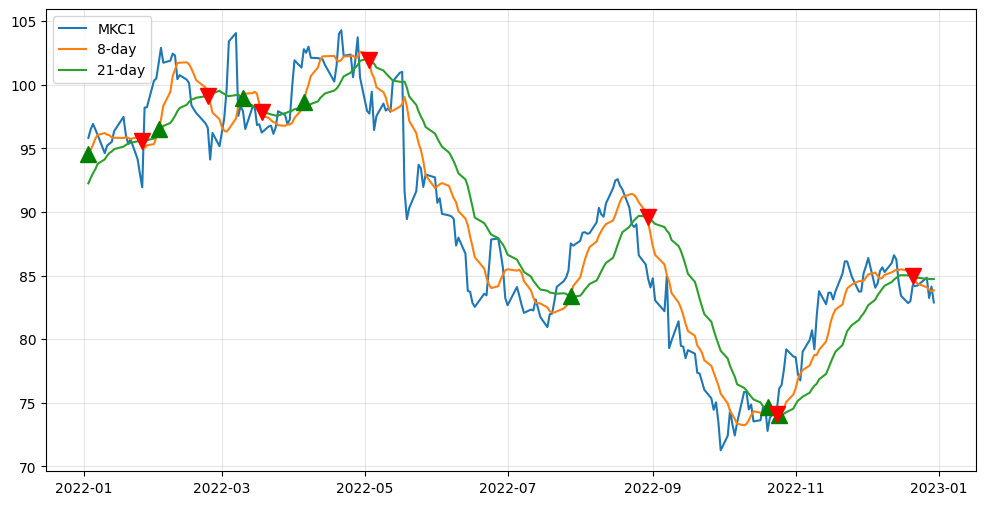

In [ ]:
# Showing last year trends

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(MKC1['close'], label = 'MKC1') # actual value
plt.plot(MKC1['8-day'], label = '8-day') # 9-day average
plt.plot(MKC1['21-day'], label = '21-day') # 21-day average
plt.plot(MKC1.loc[MKC1.Signal == 1].index, MKC1['8-day'][MKC1.Signal == 1], '^',
         color = 'g', markersize = 12) # Buy it
plt.plot(MKC1.loc[MKC1.Signal == -1].index, MKC1['21-day'][MKC1.Signal == -1], 'v',
         color = 'r', markersize = 12) # Sell it
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2);
plt.show()

##### ***3.2.1.3: How much money are we making?***

In [ ]:
# Calculating the system return
MKC1['System_return'] = MKC1['Yes_Invest'] * MKC1['Return']

# Finding cumulative return
MKC1['Cum Return'] = MKC1['System_return'].cumsum()

# Return on strategy
MKC1['Strategy_return'] = (np.exp(MKC1['Cum Return'])-1)*MKC_invest

# Considering return on 1st day will be 0, plugging that in
MKC1.loc["2022-01-03",'Strategy_return'] = 0

# Investment status for this stock
MKC1['Investment status'] = MKC_invest + MKC1['Strategy_return']

# Printing the outputs neatly with required columns
MKC1 = MKC1.loc[first_days].copy().reset_index()
MKC1.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker','Log Close'], axis = 1, inplace = True)
MKC1.rename(columns={"index": "First day"})

,First day,close,Return,8-day,21-day,Yes_Invest,Signal,System_return,Cum Return,Strategy_return,Investment status
0,2022-01-03,95.820000,-0.008211,94.541249,92.249524,1,1.0,-0.008211,-0.008211,0.000000,45900.000000
1,2022-02-01,100.489998,0.001793,95.864999,95.994762,0,0.0,0.000000,-0.037868,-1705.632761,44194.367239
2,2022-03-01,96.250000,0.011284,96.667500,99.380953,0,0.0,0.000000,-0.073524,-3253.687569,42646.312431
3,2022-04-01,101.919998,0.021020,97.383751,98.075238,0,0.0,0.000000,-0.088074,-3869.674621,42030.325379
4,2022-05-02,97.940002,-0.026499,102.471250,102.035238,1,0.0,-0.026499,-0.122299,-5283.816160,40616.183840
5,2022-06-01,90.720001,-0.021806,92.015001,95.790001,0,0.0,-0.000000,-0.122299,-5283.816160,40616.183840
6,2022-07-01,82.669998,-0.006991,85.498749,86.641905,0,0.0,-0.000000,-0.122299,-5283.816160,40616.183840
7,2022-08-01,87.730003,0.004341,84.852500,83.419524,1,0.0,0.004341,-0.095381,-4175.668841,41724.331159
8,2022-09-01,84.790001,0.008528,87.317499,89.234762,0,0.0,0.000000,-0.116810,-5060.283892,40839.716108
9,2022-10-03,72.410004,0.015869,74.953750,78.477620,0,0.0,0.000000,-0.116810,-5060.283892,40839.716108


##### ***Conclusion: Finally, we gain ~ $560 on this stock***

#### ***3.2.3: OKE:***

In [ ]:
# Using the data frame created earlier, create a new data frame to evaluate 8 day and 21 day moving averages

OKE = df['OKE'].copy()
OKE['Log Close'] = np.log(OKE['close'])
OKE['Return'] = OKE['Log Close'].diff()
OKE['8-day'] = OKE['close'].rolling(8).mean().shift()
OKE['21-day'] = OKE['close'].rolling(21).mean().shift()
OKE.dropna(inplace=True)
OKE.head(n=10)

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day
2022-01-03,58.959999,60.080002,58.790001,59.990002,55.658154,2471500,OKE,4.094178,0.020717,58.56625,59.557619
2022-01-04,60.650002,61.750000,60.450001,61.400002,56.966343,2813800,OKE,4.117410,0.023232,58.82625,59.524286
2022-01-05,62.049999,62.299999,60.540001,60.639999,56.261215,2102200,OKE,4.104955,-0.012455,59.27875,59.590476
2022-01-06,62.200001,62.349998,60.680000,61.650002,57.198288,2449500,OKE,4.121473,0.016519,59.60625,59.578572
2022-01-07,61.650002,62.560001,61.400002,62.459999,57.949791,2242800,OKE,4.134526,0.013053,59.88625,59.529524
2022-01-10,61.730000,62.279999,59.759998,60.779999,56.391106,3083000,OKE,4.107261,-0.027266,60.26875,59.534286
2022-01-11,61.180000,62.549999,60.400002,62.480000,57.968349,3134700,OKE,4.134846,0.027586,60.52000,59.489048
2022-01-12,62.939999,63.549999,62.349998,62.500000,57.986908,2538400,OKE,4.135167,0.000320,61.02000,59.511905
2022-01-13,62.500000,63.049999,61.430000,61.650002,57.198288,2334800,OKE,4.121473,-0.013693,61.48750,59.621429
2022-01-14,61.900002,62.770000,61.540001,62.610001,58.088963,2879700,OKE,4.136925,0.015452,61.69500,59.730000


In [ ]:
# Checking on investment if moving 8 day average is better than 21 day average

OKE['Yes_Invest'] = np.where(OKE['8-day'] > OKE['21-day'], 1, 0)
print(OKE['Yes_Invest'].value_counts())

1    152
0     99
Name: Yes_Invest, dtype: int64


##### ***3.2.3.1: Strategy on entering or leaving the market:***

In [ ]:
OKE['Signal'] = OKE['Yes_Invest'].diff()
OKE.loc["2022-01-03",'Signal'] = 1 # Buy TECH on the first trading day basis signal

# Checking on how many days would we invest in the stock
print(OKE['Signal'].value_counts())

# 1 - Means invest - YES
# 0 - Means - Do nothing
# -1 Means - NO - move out

 0.0    238
 1.0      7
-1.0      6
Name: Signal, dtype: int64


In [ ]:
# Checking on trading days

OKE[OKE['Signal'].isin([1,-1])]

,open,high,low,close,adjclose,volume,ticker,Log Close,Return,8-day,21-day,Yes_Invest,Signal
2022-01-03,58.959999,60.080002,58.790001,59.990002,55.658154,2471500,OKE,4.094178,0.020717,58.566250,59.557619,0,1.0
2022-01-06,62.200001,62.349998,60.680000,61.650002,57.198288,2449500,OKE,4.121473,0.016519,59.606250,59.578572,1,1.0
2022-01-26,60.570000,61.639999,59.160000,59.849998,55.528263,3723100,OKE,4.091841,0.004354,60.253750,60.416667,0,-1.0
2022-02-07,62.889999,63.849998,62.470001,63.259998,59.618454,2093600,OKE,4.147253,0.005866,61.213749,61.029047,1,1.0
2022-02-25,61.779999,64.029999,61.660000,64.000000,60.315857,3735800,OKE,4.158883,0.039358,61.860000,61.988095,0,-1.0
2022-03-03,67.000000,68.070000,66.540001,67.709999,63.812298,3629800,OKE,4.215234,0.009199,63.061250,62.950952,1,1.0
2022-04-26,66.639999,67.190002,65.269997,65.269997,61.512745,2357300,OKE,4.178532,-0.015657,70.992501,71.030476,0,-1.0
2022-05-25,63.889999,65.209999,63.799999,65.139999,62.260124,3153200,OKE,4.176539,0.021883,64.415001,64.337619,1,1.0
2022-06-16,58.049999,58.310001,55.389999,55.730000,53.266151,4979100,OKE,4.020519,-0.068646,64.609999,65.130952,0,-1.0
2022-07-19,57.000000,58.650002,57.000000,58.360001,55.779877,2111200,OKE,4.066631,0.024281,55.831249,55.446190,1,1.0


##### ***3.2.3.2: Plotting the graph***

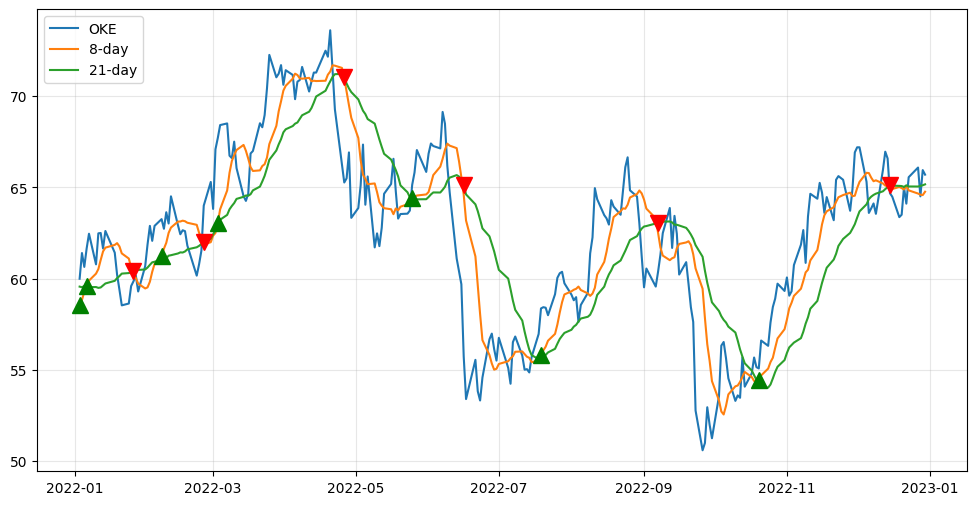

In [ ]:
# Showing last year trends

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(OKE['close'], label = 'OKE') # actual value
plt.plot(OKE['8-day'], label = '8-day') # 9-day average
plt.plot(OKE['21-day'], label = '21-day') # 21-day average
plt.plot(OKE.loc[OKE.Signal == 1].index, OKE['8-day'][OKE.Signal == 1], '^',
         color = 'g', markersize = 12) # Buy it
plt.plot(OKE.loc[OKE.Signal == -1].index, OKE['21-day'][OKE.Signal == -1], 'v',
         color = 'r', markersize = 12) # Sell it
plt.grid(True, alpha = .3) # grid
plt.legend(loc=2);
plt.show()

##### ***3.2.3.3: How much money are we making?***

In [ ]:
# Calculating the system return
OKE['System_return'] = OKE['Yes_Invest'] * OKE['Return']

# Finding cumulative return
OKE['Cum Return'] = OKE['System_return'].cumsum()

# Return on strategy
OKE['Strategy_return'] = (np.exp(OKE['Cum Return'])-1)*OKE_invest

# Considering return on 1st day will be 0, plugging that in
OKE.loc["2022-01-03",'Strategy_return'] = 0

# Investment status for this stock
OKE['Investment status'] = OKE_invest + OKE['Strategy_return']

# Printing the outputs neatly with required columns
OKE = OKE.loc[first_days].copy().reset_index()
OKE.drop(['open', 'high', 'low', 'adjclose', 'volume', 'ticker','Log Close'], axis = 1, inplace = True)
OKE.rename(columns={"index": "First day"})

,First day,close,Return,8-day,21-day,Yes_Invest,Signal,System_return,Cum Return,Strategy_return,Investment status
0,2022-01-03,59.990002,0.020717,58.566250,59.557619,0,1.0,0.000000,0.000000,0.000000,6400.000000
1,2022-02-01,61.869999,0.019421,59.516250,60.603809,0,0.0,0.000000,-0.017467,-110.817863,6289.182137
2,2022-03-01,63.820000,-0.022925,62.353750,62.430000,0,0.0,-0.000000,-0.039329,-246.821864,6153.178136
3,2022-04-01,71.430000,0.011263,70.573750,68.189047,1,0.0,0.011263,0.023354,151.222837,6551.222837
4,2022-05-02,63.869999,0.008491,67.711250,69.828572,0,0.0,0.000000,-0.051174,-319.276323,6080.723677
5,2022-06-01,66.849998,0.015072,64.747500,64.472858,1,0.0,0.015072,-0.003378,-21.585259,6378.414741
6,2022-07-01,56.750000,0.022273,55.315000,60.478571,0,0.0,0.000000,-0.116665,-704.748305,5695.251695
7,2022-08-01,59.119999,-0.010433,59.300001,57.190000,1,0.0,-0.010433,-0.079445,-488.776693,5911.223307
8,2022-09-01,59.520000,-0.028325,64.332500,62.855238,1,0.0,-0.028325,-0.072702,-448.781795,5951.218205
9,2022-10-03,53.549999,0.044095,53.316250,58.219524,0,0.0,0.000000,-0.072030,-444.782229,5955.217771


##### ***Conclusion: We again gain some money at ~ $858 on this stock***

#### ***3.2.4: Calculating portfolio return***

In [ ]:
Portfolio = pd.DataFrame()

# Create columns with investment
Portfolio['TECH Investment'] = TECH1['Investment status']
Portfolio['MKC Investment'] = MKC1['Investment status']
Portfolio['OKE Investment'] = OKE['Investment status']

# Total value
Portfolio['Total Investment'] = TECH1['Investment status'] + MKC1['Investment status'] + OKE['Investment status']

# Create columns with returns
Portfolio['TECH Return'] = TECH1['Strategy_return']
Portfolio['MKC Return'] = MKC1['Strategy_return']
Portfolio['OKE Return'] = OKE['Strategy_return']

# Total return
Portfolio['Total Return'] = TECH1['Strategy_return'] + MKC1['Strategy_return'] + OKE['Strategy_return']

# Printing outputs
# Portfolio = Portfolio.loc[first_days].copy().reset_index()
Portfolio.rename(columns={"index": "First day"},inplace = True)
Portfolio


,TECH Investment,MKC Investment,OKE Investment,Total Investment,TECH Return,MKC Return,OKE Return,Total Return
0,47700.000000,45900.000000,6400.000000,100000.000000,0.000000,0.000000,0.000000,0.000000
1,38289.818907,44194.367239,6289.182137,88773.368284,-9410.181093,-1705.632761,-110.817863,-11226.631716
2,38914.251655,42646.312431,6153.178136,87713.742223,-8785.748345,-3253.687569,-246.821864,-12286.257777
3,35349.040036,42030.325379,6551.222837,83930.588252,-12350.959964,-3869.674621,151.222837,-16069.411748
4,33674.883202,40616.183840,6080.723677,80371.790719,-14025.116798,-5283.816160,-319.276323,-19628.209281
5,33674.883202,40616.183840,6378.414741,80669.481783,-14025.116798,-5283.816160,-21.585259,-19330.518217
6,30122.006016,40616.183840,5695.251695,76433.441551,-17577.993984,-5283.816160,-704.748305,-23566.558449
7,31447.457484,41724.331159,5911.223307,79083.011950,-16252.542516,-4175.668841,-488.776693,-20916.988050
8,29766.199226,40839.716108,5951.218205,76557.133539,-17933.800774,-5060.283892,-448.781795,-23442.866461
9,29766.199226,40839.716108,5955.217771,76561.133105,-17933.800774,-5060.283892,-444.782229,-23438.866895


#### ***Conclusion: We lose whopping $ 14378 in total with this strategy.***

## ***3.3: Momentum trading strategy for the entire MPT portfolio***

In [ ]:
# Creating a data frame to store results at portfolio level
Portfolio1 = pd.DataFrame()

# Storing Returns
Portfolio1['TECH Return'] = TECH1['Return']
Portfolio1['MKC Return'] = MKC1['Return']
Portfolio1['OKE Return'] = OKE['Return']

# Storing Signals for indication
Portfolio1['TECH Signal'] = TECH1['Signal']
Portfolio1['MKC Signal'] = MKC1['Signal']
Portfolio1['OKE Signal'] = OKE['Signal']

# Determine buying and selling at portfolio level by creating signal sum
Portfolio1['Portfolio Signal'] = TECH1['Signal'] + MKC1['Signal'] + OKE['Signal']

# Creating indicator colum for signal
Portfolio1['Signal'] = np.where(Portfolio1['Portfolio Signal'] > 0, 1, np.where(Portfolio1['Portfolio Signal'] < 0, -1, 0))

# Calculate cumulative signal to figure out when money is in and out
Portfolio1['Signal_Cum'] = Portfolio1['Signal'].cumsum()

# Make a column to check on investment
Portfolio1['Investment'] = np.where(Portfolio1['Signal_Cum'] > 0, 1, np.where(Portfolio1['Signal_Cum'] < 0, 0, 0))

# Calculating return for the portfolio
Portfolio1['TECH Return'] = Portfolio1['Investment'] * Portfolio1['TECH Return']
Portfolio1['MKC Return'] = Portfolio1['Investment'] * Portfolio1['MKC Return']
Portfolio1['OKE Return'] = Portfolio1['Investment'] * Portfolio1['OKE Return']

# Calculate sumulative return
Portfolio1['TECH Cum Return'] = Portfolio1['TECH Return'].cumsum()
Portfolio1['MKC Cum Return'] = Portfolio1['MKC Return'].cumsum()
Portfolio1['OKE Cum Return'] = Portfolio1['OKE Return'].cumsum()

# Converting into monetary value
Portfolio1['TECH Strategy Return'] = (np.exp(Portfolio1['TECH Cum Return'])-1)*TECH_invest
Portfolio1['MKC Strategy Return'] = (np.exp(Portfolio1['MKC Cum Return'])-1)*MKC_invest
Portfolio1['OKE Strategy Return'] = (np.exp(Portfolio1['OKE Cum Return'])-1)*OKE_invest

# Setting first day return to 0 as done earlier
Portfolio1.loc["2022-01-03",'TECH Strategy Return'] = 0
Portfolio1.loc["2022-01-03",'MKC Strategy Return'] = 0
Portfolio1.loc["2022-01-03",'OKE Strategy Return'] = 0

# Calculating total investment for the portfolio
Portfolio1['TECH Investment'] = TECH_invest + Portfolio1['TECH Strategy Return']
Portfolio1['MKC Investment'] = MKC_invest + Portfolio1['MKC Strategy Return']
Portfolio1['OKE Investment'] = OKE_invest + Portfolio1['OKE Strategy Return']


In [ ]:
# Calculate total value of the portfolio
Portfolio1['Total Investment'] = Portfolio1['TECH Investment'] + Portfolio1['MKC Investment'] + Portfolio1['OKE Investment']

# Calculating total return of the portfolio
Portfolio1['Total Return'] = Portfolio1['TECH Strategy Return'] + Portfolio1['MKC Strategy Return'] + Portfolio1['OKE Strategy Return']

# Portfolio2 = Portfolio1.loc[first_days].copy().reset_index()

In [ ]:
# Printing out the final table with required details

Portfolio2 =  Portfolio1.copy()
# Portfolio2.rename(columns={"index": "First day"}, inplace = True)
Portfolio2.dropna(inplace = True)
Portfolio2

,TECH Return,MKC Return,OKE Return,TECH Signal,MKC Signal,OKE Signal,Portfolio Signal,Signal,Signal_Cum,Investment,...,MKC Cum Return,OKE Cum Return,TECH Strategy Return,MKC Strategy Return,OKE Strategy Return,TECH Investment,MKC Investment,OKE Investment,Total Investment,Total Return
0,-0.058815,-0.008211,0.020717,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,-0.008211,0.020717,-2724.58306,-375.334249,133.969056,44975.41694,45524.665751,6533.969056,97034.051747,-2965.948253
1,0.064703,0.001793,0.019421,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
2,0.000000,0.000000,-0.000000,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
4,0.000000,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
5,-0.000000,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
6,0.000000,-0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
7,-0.000000,0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
8,0.000000,0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608
9,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.006418,0.040138,281.66450,-293.642953,262.107061,47981.66450,45606.357047,6662.107061,100250.128608,250.128608


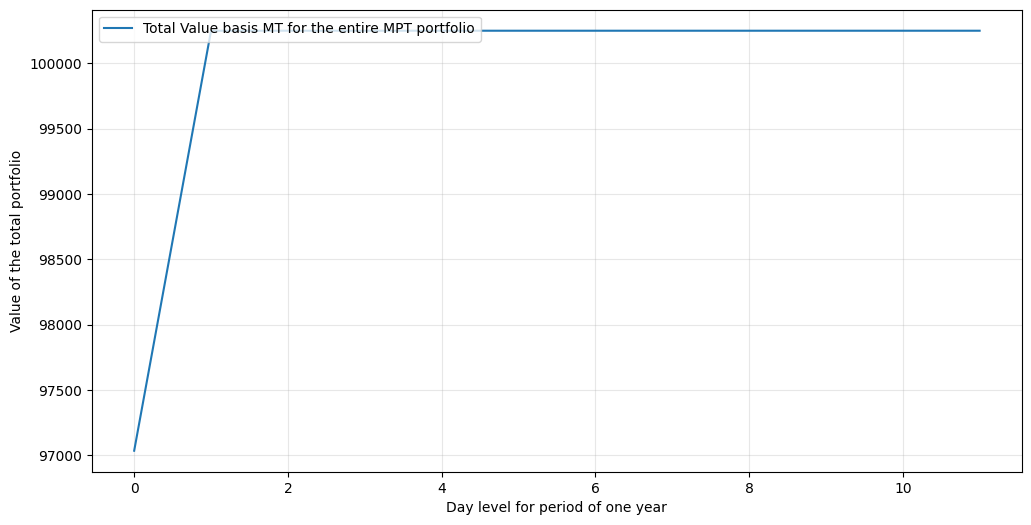

In [ ]:
# Plotting MT investment for total MPT stock

plt.plot(((Portfolio2['Total Investment'])), label = 'Total Value basis MT for the entire MPT portfolio')
plt.legend(loc = 2 )
plt.xlabel('Day level for period of one year')
plt.ylabel('Value of the total portfolio')
plt.grid(True, alpha=.3)
plt.show()

#### ***Conclusion: We gain $ 250 with this strategy.***

## ***3.4: Buy-and-Hold strategy for the S&P 500 index***

In [ ]:
# Create a new data frame to store data for S&P 500 index Buy and Hold Strategy
Buy_Hold2 = pd.DataFrame()

# Taking data for performace of stocks using GSPC index
GSPC = si.get_data('^GSPC',start_date = '1/1/2022',end_date='1/1/2023',interval='1d')

# Storing the prices in our new data frame
Buy_Hold2['GSPC Price'] = GSPC['close']

# Price on 1st day of trading
GSPC_Buy = Buy_Hold2.loc['2022-01-03', 'GSPC Price']

# No. of shares
GSPC_shares = invest_fund / GSPC_Buy

# Total amount invested
Buy_Hold2['GSPC Investment'] = Buy_Hold2['GSPC Price'] * GSPC_shares

# Calculate total return for the portfolio
Buy_Hold2['Return'] = Buy_Hold2['GSPC Investment'] - invest_fund

In [ ]:
# Printing the data frame with required columns
Buy_Hold2 = Buy_Hold2.loc[first_days].copy().reset_index()
Buy_Hold2

,index,GSPC Price,GSPC Investment,Return
0,2022-01-03,4796.560059,100000.000000,0.000000
1,2022-02-01,4546.540039,94787.514042,-5212.485958
2,2022-03-01,4306.259766,89778.084982,-10221.915018
3,2022-04-01,4545.859863,94773.333551,-5226.666449
4,2022-05-02,4155.379883,86632.499793,-13367.500207
5,2022-06-01,4101.229980,85503.567773,-14496.432227
6,2022-07-01,3825.330078,79751.530918,-20248.469082
7,2022-08-01,4118.629883,85866.325711,-14133.674289
8,2022-09-01,3966.850098,82701.979110,-17298.020890
9,2022-10-03,3678.429932,76688.916363,-23311.083637


#### ***Conclusion: We are losing $ 15,010 with this strategy***

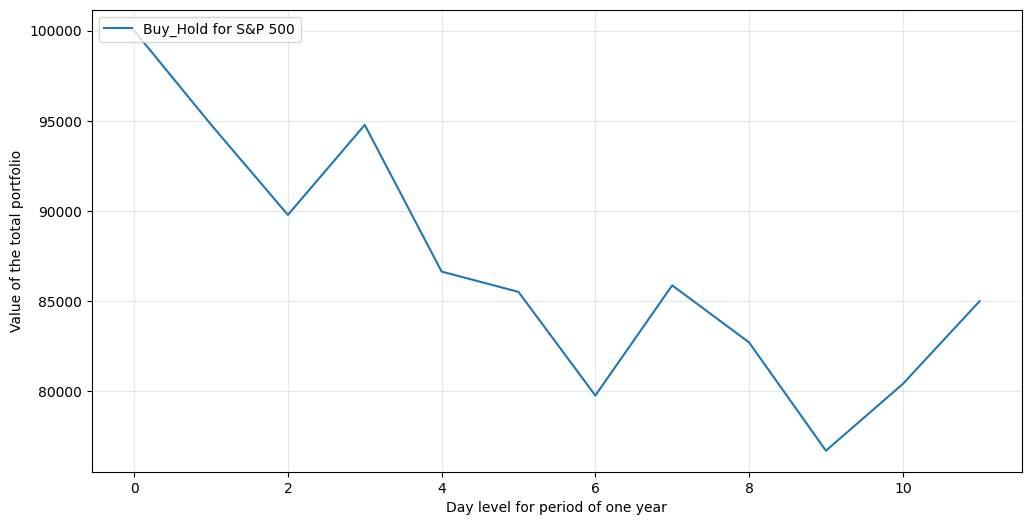

In [ ]:
# Plotting GSPC investment

plt.plot(Buy_Hold2['GSPC Investment'], label='Buy_Hold for S&P 500')
plt.legend(loc = 2 )
plt.xlabel('Day level for period of one year')
plt.ylabel('Value of the total portfolio')
plt.grid(True, alpha=.3)
plt.show()

## ***3.5: Plot Comparing the Investment Strategies***

#### ***Plotting all the four strategies in one single plot as below:***

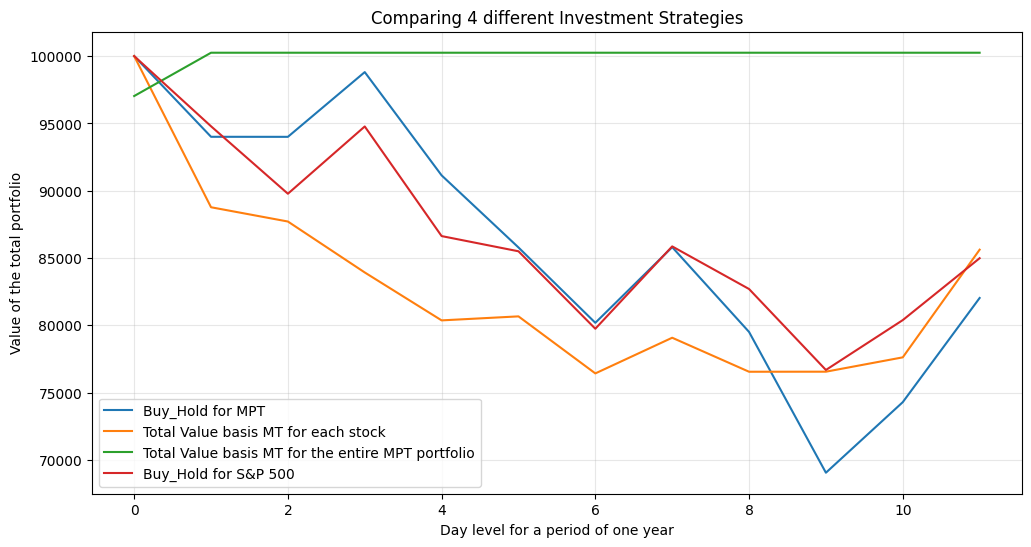

In [ ]:
# Plot all the four strategies on a single plot

# Plotting MPT investment
plt.plot(Buy_Hold["Portfolio Value"], label='Buy_Hold for MPT')

# Plotting MT investment for each stock
plt.plot(Portfolio['Total Investment'], label='Total Value basis MT for each stock')

# Plotting MT investment for each MPT stock
plt.plot(Portfolio2['Total Investment'], label='Total Value basis MT for the entire MPT portfolio')

# Plotting GSPC investment
plt.plot(Buy_Hold2['GSPC Investment'], label='Buy_Hold for S&P 500')

# Pretty graphs
plt.legend(loc = 3 ) # legend

plt.xlabel('Day level for a period of one year')
plt.ylabel('Value of the total portfolio')
plt.title('Comparing 4 different Investment Strategies')
plt.grid(True, alpha=.3)
plt.show()

## ***3.6: Discussion and Comparison of the Investment Strategies***

#### ***Key comparsion pointers:***

**1)** We initially started off our selection of 3 stocks basis the risk levels and fair degree of spread amongst the three stocks so as to gain  better returns.

Hence, we chose stocks from each sector with risk levels at 0.0017 and individual contribution as:

- **47.7 %**in TECH for Pharma sector
- **45.9%** is in MKC for Consumer Staples sector
- **6.4%**is in OKE for Energy sector

**2)** For our first strategy - ***Buy and Hold MPT***, we were **down** significantly by **~ 18000 $**. WE had negative returns from TECH and MKC while OKE gave us slightly better returns. Here, in long run,



**3)** For our second strategy - ***Momentum Trading*** basis each stock of the MPT portfolio, we lose but we lose slighlty lower amount against the first strategy. This is becasue over a period of one year, we gain from both MKC and OKE but lose significantly from TECH; hence **losing** big amount at an overall level ~ **14378 $**.

4) For our third strategy - ***Momentum Trading for the entire MPT portfolio***, we finally gain while it is just a marginal return that we have from our investments. We **gain $ 250**. This is becasue the strategy asks us to stop doing anything from the 4th month itself and hence we do not have impact of the fluctuations in the marketplace.

4) For our fourth strategy - ***Buy and Hold for S&P 500*** stocks, we **lose** at **15010 $** which is again a very big amount. This is because there is a significant loss over the entire period of one year for the S&P stocks and cumulatively, we lose big time.

# ***4 - Conclusion***

## ***4.1: Thoughts and Insights***

Basis the above, we can conclude as below:

**1)** Our best returns came from Momentum Trading. While it is high on risks, we can have bettern returns by taking mature calls. The decision to hold and not react basis current market fluctuations helped us gain slightly over a period of one year.


**2)** Our worst strategy came out to be Buy and Hold. But here, given it is not as high on risk and rewards as MT, we should be looking at a longer time horizon to be able to decide if this strategy can be adopted. As investors would prefer low risk options, there are chances of lower returns on this strategy.



**3)** Overall, we looked at a one year horizon. This could be looked into a longer horizon as certain stocks would definetely have gained or lost becasue of the economic fluctuations owing to COVID during this time period. Hence, a longer horizon can be looked at.





Overall, MT can work well for risk seeking investers.

## ***4.2: Individual Contributions***

1) **Pooja:**

* Presenter  
* Worked on the 4 set of strategies along with MPT portfolio for each stock, Momentum trading for the entire portofolio, and the S&P 500 index.
* Studied the diferent strategies and compared results to share conclusions on different portfolio strategies.
* Responsible for sharing insights on time series across strategies.

2) **Krishna:**
*   Worked on Buy-and-Hold Strategy and part of Momentum Trading
*   Shared inputs on different stocks to understand diversity and risk profiles of the stocks for better selection of fine 9 stocks
* Provided input on how the stocks performed over the period of one year for the three sectors.


3) ***Joao:***

*   Responsible for the initial leg of Data Preparation
*   Helped provide input on stock selection
*   Helped in sharing insights on building up the model with different set of constraints and optimizing it to generate maximium returns.



